1. Data Preparation
We load the exhibition dataset containing traits like Nationality, Gender, and Exhibition Role (e.g., Artist, Curator).

These text-based traits are converted into numbers using LabelEncoder to make them usable by machine learning models.

2. Model Training
A K-Nearest Neighbors (KNN) model is trained using the encoded traits to find exhibitions similar to a user’s profile.

3. User Simulation
We randomly pick 5 unique combinations of user traits (Nationality, Gender, Role) to simulate real users for evaluation.

4. Recommendations
For each simulated user, we find their 10 nearest exhibition matches using the trained KNN model.

5. Relevance Criteria (Weighted Scoring)
Each recommendation is evaluated for relevance using this weighted scheme:

Trait	Weight
Nationality	0.5
Gender	0.2
Role	0.3
A recommendation is considered relevant if the total score of matched traits is greater than or equal to 0.7.

For example:

If Nationality and Role both match: 0.5 + 0.3 = 0.8 → Relevant

If only Gender matches: 0.2 → Not Relevant

6. Metric Calculation
For each user, we calculate:

Precision: How many of the recommended exhibitions are actually relevant.

Recall: How many relevant exhibitions were successfully recommended.

F1 Score: A balance between Precision and Recall.

7. Final Output
For every user, the system displays:

Their traits.

URLs of recommended exhibitions.

Relevance scores for each recommendation.

Precision, Recall, and F1 Score.

Then it computes and prints average evaluation scores across all 5 users.

weighted relevance criteria

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the data
exhibition_data = pd.read_csv('Clustered_Exhibition_Data.csv')

# Encode categorical features
nationality_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
role_encoder = LabelEncoder()

exhibition_data['Nationality_encoded'] = nationality_encoder.fit_transform(exhibition_data['Nationality'])
exhibition_data['Gender_encoded'] = gender_encoder.fit_transform(exhibition_data['Gender'])
exhibition_data['Role_encoded'] = role_encoder.fit_transform(exhibition_data['ExhibitionRole'])

features = exhibition_data[['Nationality_encoded', 'Gender_encoded', 'Role_encoded']]

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(features)

# Sample real users
unique_users = exhibition_data[['Nationality', 'Gender', 'ExhibitionRole']].drop_duplicates().sample(n=5, random_state=42)

# Weights and threshold for relevance scoring
weights = {'Nationality': 0.5, 'Gender': 0.2, 'Role': 0.3}
threshold = 0.7

precision_list = []
recall_list = []
f1_list = []

print("Evaluation Report:\n")

for i, user in unique_users.iterrows():
    try:
        user_vector = [
            nationality_encoder.transform([user['Nationality']])[0],
            gender_encoder.transform([user['Gender']])[0],
            role_encoder.transform([user['ExhibitionRole']])[0]
        ]

        distances, indices = knn_model.kneighbors([user_vector])
        recommendations = exhibition_data.iloc[indices[0]]

        y_true = []
        y_pred = []

        print(f"User {i + 1}:")
        print(f"  Traits - Nationality: {user['Nationality']}, Gender: {user['Gender']}, Role: {user['ExhibitionRole']}")
        print("  Recommended Exhibition URLs:")

        for _, row in recommendations.iterrows():
            score = 0
            if row['Nationality'] == user['Nationality']:
                score += weights['Nationality']
            if row['Gender'] == user['Gender']:
                score += weights['Gender']
            if row['ExhibitionRole'] == user['ExhibitionRole']:
                score += weights['Role']

            relevance = 1 if score >= threshold else 0
            y_true.append(relevance)
            y_pred.append(1)  # All are recommended

            print(f"   - {row['ExhibitionURL']} (Relevance Score: {score:.2f})")

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        print(f"  Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
        print("-" * 40)

    except Exception as e:
        print(f"User {i + 1} Error: {e}")
        print("-" * 40)

# Averages
print("Average Evaluation Scores:")
print(f"  Avg Precision: {sum(precision_list)/len(precision_list):.2f}")
print(f"  Avg Recall:    {sum(recall_list)/len(recall_list):.2f}")
print(f"  Avg F1 Score:  {sum(f1_list)/len(f1_list):.2f}")


Evaluation Report:

User 32959:
  Traits - Nationality: Italian, Gender: Male, Role: Designer
  Recommended Exhibition URLs:
   - moma.org/calendar/exhibitions/1785 (Relevance Score: 1.00)
   - moma.org/calendar/exhibitions/1722 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1895 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1895 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2528 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2497 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2510 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1850 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2009 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2497 (Relevance Score: 0.70)
  Precision: 1.00, Recall: 1.00, F1 Score: 1.00
----------------------------------------
User 3737:
  Traits - Nationality: American, Gender: Male, Role: Designer
  Recommended Exhibition URLs:
   - moma.org/calendar/exhibitions/3258 (

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


confusion matrix

Evaluation Report:

User 32959:
  Traits - Nationality: Italian, Gender: Male, Role: Designer
  Recommended Exhibition URLs:
   - moma.org/calendar/exhibitions/1785 (Relevance Score: 1.00)
   - moma.org/calendar/exhibitions/1722 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1895 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1895 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2528 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2497 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2510 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/1850 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2009 (Relevance Score: 0.70)
   - moma.org/calendar/exhibitions/2497 (Relevance Score: 0.70)
  Precision: 1.00, Recall: 1.00, F1 Score: 1.00
----------------------------------------
User 3737:
  Traits - Nationality: American, Gender: Male, Role: Designer
  Recommended Exhibition URLs:
   - moma.org/calendar/exhibitions/3258 (

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


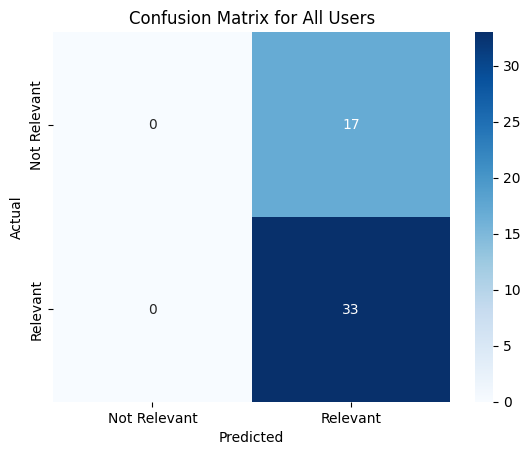

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load the data
exhibition_data = pd.read_csv('Clustered_Exhibition_Data.csv')

# Encode categorical features
nationality_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
role_encoder = LabelEncoder()

exhibition_data['Nationality_encoded'] = nationality_encoder.fit_transform(exhibition_data['Nationality'])
exhibition_data['Gender_encoded'] = gender_encoder.fit_transform(exhibition_data['Gender'])
exhibition_data['Role_encoded'] = role_encoder.fit_transform(exhibition_data['ExhibitionRole'])

features = exhibition_data[['Nationality_encoded', 'Gender_encoded', 'Role_encoded']]

# Fit KNN model
knn_model = NearestNeighbors(n_neighbors=10)
knn_model.fit(features)

# Sample real users
unique_users = exhibition_data[['Nationality', 'Gender', 'ExhibitionRole']].drop_duplicates().sample(n=5, random_state=42)

# Weights and threshold for relevance scoring
weights = {'Nationality': 0.5, 'Gender': 0.2, 'Role': 0.3}
threshold = 0.7

# Lists to store evaluation data
precision_list = []
recall_list = []
f1_list = []
all_y_true = []
all_y_pred = []

print("Evaluation Report:\n")

for i, user in unique_users.iterrows():
    try:
        user_vector = [
            nationality_encoder.transform([user['Nationality']])[0],
            gender_encoder.transform([user['Gender']])[0],
            role_encoder.transform([user['ExhibitionRole']])[0]
        ]

        distances, indices = knn_model.kneighbors([user_vector])
        recommendations = exhibition_data.iloc[indices[0]]

        y_true = []
        y_pred = []

        print(f"User {i + 1}:")
        print(f"  Traits - Nationality: {user['Nationality']}, Gender: {user['Gender']}, Role: {user['ExhibitionRole']}")
        print("  Recommended Exhibition URLs:")

        for _, row in recommendations.iterrows():
            score = 0
            if row['Nationality'] == user['Nationality']:
                score += weights['Nationality']
            if row['Gender'] == user['Gender']:
                score += weights['Gender']
            if row['ExhibitionRole'] == user['ExhibitionRole']:
                score += weights['Role']

            relevance = 1 if score >= threshold else 0
            y_true.append(relevance)
            y_pred.append(1)  # All items are recommended
            print(f"   - {row['ExhibitionURL']} (Relevance Score: {score:.2f})")

        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

        print(f"  Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
        print("-" * 40)

    except Exception as e:
        print(f"User {i + 1} Error: {e}")
        print("-" * 40)

# Aggregate Scores
print("Average Evaluation Scores:")
print(f"  Avg Precision: {sum(precision_list)/len(precision_list):.2f}")
print(f"  Avg Recall:    {sum(recall_list)/len(recall_list):.2f}")
print(f"  Avg F1 Score:  {sum(f1_list)/len(f1_list):.2f}")

# Confusion Matrix
print("\nConfusion Matrix (Aggregated for All Users):")
conf_matrix = confusion_matrix(all_y_true, all_y_pred)
print(conf_matrix)

# Optional: Display Confusion Matrix in Table Format
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for All Users')
plt.show()
